In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('dataset/final_clean_encoded.csv')

In [58]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Hour_of_Day,Accident_Severity
0,0,1,0,5,1,2,4,0,4,0,...,3,2,4,0,5,2,7,12,17,2
1,0,2,0,2,1,5,6,0,3,0,...,3,2,4,0,5,2,7,10,17,2
2,0,1,0,2,1,2,7,0,5,0,...,2,0,2,3,4,2,7,14,17,1
3,6,1,0,2,1,4,6,1,5,0,...,1,1,1,3,4,2,7,15,1,2
4,6,1,0,2,1,2,8,0,3,0,...,3,2,4,0,5,2,7,10,1,2


In [59]:
data = df.drop('Accident_Severity', axis = 1)

labels = df['Accident_Severity']

In [61]:
from imblearn.over_sampling import SMOTENC
# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(30))

smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_resampled , y_resampled = smote.fit_resample(data,labels)
X_resampled.shape, y_resampled.shape

/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((31245, 31), (31245,))

In [62]:
X_resampled.shape

(31245, 31)

In [63]:
y_resampled.shape

(31245,)

In [64]:
X_resampled.head()


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Hour_of_Day
0,0,1,0,5,1,2,4,0,4,0,...,10,3,2,4,0,5,2,7,12,17
1,0,2,0,2,1,5,6,0,3,0,...,10,3,2,4,0,5,2,7,10,17
2,0,1,0,2,1,2,7,0,5,0,...,10,2,0,2,3,4,2,7,14,17
3,6,1,0,2,1,4,6,1,5,0,...,10,1,1,1,3,4,2,7,15,1
4,6,1,0,2,1,2,8,0,3,0,...,10,3,2,4,0,5,2,7,10,1


In [65]:
data = X_resampled
labels = y_resampled

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.25, random_state = 42, stratify = labels)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23433, 31)
(7812, 31)
(23433,)
(7812,)


In [12]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
## mutual info classif to check informative features
mi_calc = mutual_info_classif(data, labels, random_state=42)

mi_df = pd.DataFrame({'Columns':data.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False)
mi_df.shape


(31, 2)

In [13]:
df_mi_score_greater = mi_df[mi_df['MI_score'] > 0]
df_mi_score_greater.shape

(30, 2)

In [14]:
from sklearn.feature_selection import SelectKBest
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(chi2, k=15)
X_new = fs.fit_transform(data, labels)
X_new.shape
cols = fs.get_feature_names_out()



In [15]:
cols

array(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Type_of_vehicle', 'Owner_of_vehicle',
       'Defect_of_vehicle', 'Light_conditions',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Cause_of_accident', 'Hour_of_Day'], dtype=object)

In [16]:
X_new.shape

(31635, 15)

In [17]:
labels.shape

(31635,)

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_new,labels,test_size = 0.25, random_state = 42, stratify = labels)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23726, 15)
(7909, 15)
(23726,)
(7909,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
# Start an MLflow experiment
n_estimators = 100
max_depth = 20
 # Train the model
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2614
           1       0.82      0.85      0.83      2691
           2       0.85      0.79      0.82      2604

    accuracy                           0.88      7909
   macro avg       0.88      0.88      0.88      7909
weighted avg       0.88      0.88      0.88      7909



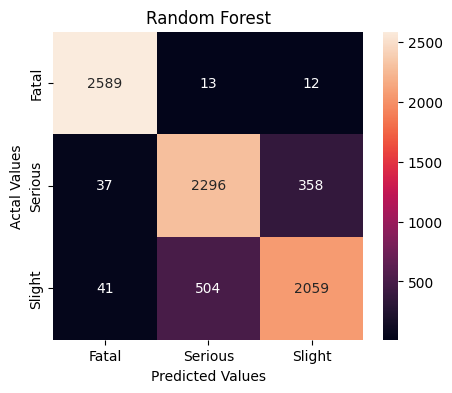

In [22]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Random Forest")
plt.show()

In [23]:
import xgboost as xgb
learning_rate = 0.3
max_depth = 10
gamma = 0
min_samples_split = 10 
n_estimators = 500
subsample = 0.9
colsample_bytree =0.6

# Create logistic regression model
xgb_model =  xgb.XGBClassifier(learning_rate = learning_rate,
                                    max_depth = max_depth,
                                    n_estimators = n_estimators,
                                    subsample = subsample,
                                   gamma = gamma ,
                                  colsample_bytree = colsample_bytree)

# Fit model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = xgb_model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2614
           1       0.82      0.86      0.84      2691
           2       0.85      0.80      0.82      2604

    accuracy                           0.88      7909
   macro avg       0.88      0.88      0.88      7909
weighted avg       0.88      0.88      0.88      7909



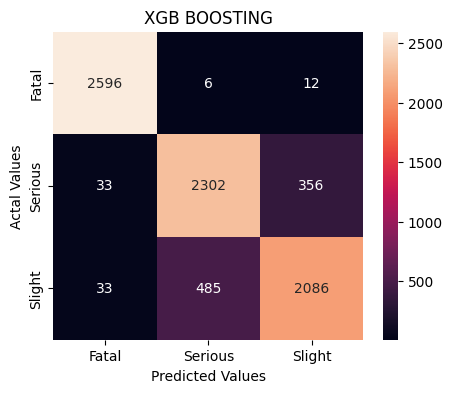

In [25]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("XGB BOOSTING")
plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingClassifier 
learning_rate = 0.07335297107608947
max_depth = 7
min_samples_split = 10 
n_estimators =300, 
subsample = 0.8
# Create logistic regression model
gb = GradientBoostingClassifier(learning_rate = learning_rate,
                                    max_depth = max_depth,
                                    min_samples_split = min_samples_split,
                                    n_estimators = 300,
                                    subsample = 0.8)

# Fit model on training data
gb.fit(X_train, y_train)

# Make predictions on test data
y_pred = gb.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2614
           1       0.82      0.85      0.83      2691
           2       0.85      0.80      0.82      2604

    accuracy                           0.88      7909
   macro avg       0.88      0.88      0.88      7909
weighted avg       0.88      0.88      0.88      7909



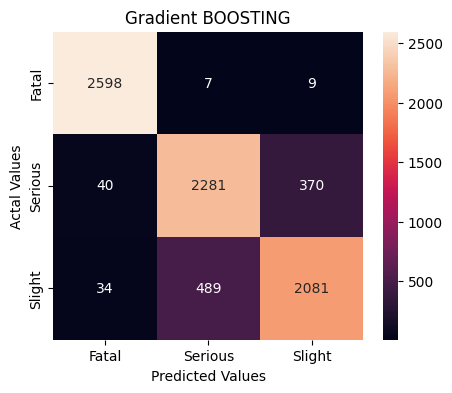

In [28]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Gradient BOOSTING")
plt.show()

In [68]:
import mlflow

from sklearn.ensemble import VotingClassifier

mlflow.set_tracking_uri("http://localhost:5000")


random_logged_model = 'mlflow-artifacts:/844546817153085467/d3b4ecccbeab4e1080ca5da586f0ac50/artifacts/random_forest_all'
gradient_logged_model = 'mlflow-artifacts:/246528904773499517/ef8ba33281b24649ba531c5403cac2b4/artifacts/GradientBoosting'
Xg_logged_model = 'mlflow-artifacts:/181329989193874871/6689b28bad584ba1bcf73caf464749a4/artifacts/XGBoosting'


# # Load model as a PyFuncModel.
# random_model = mlflow.pyfunc.load_model(random_logged_model)
# gradient_model = mlflow.pyfunc.load_model(gradient_logged_model)
# XGBoost_model = mlflow.pyfunc.load_model(Xg_logged_model)

# Load all three models
random_model = mlflow.sklearn.load_model(random_logged_model)
gradient_model = mlflow.sklearn.load_model(gradient_logged_model)
XGBoost_model = mlflow.sklearn.load_model(Xg_logged_model)



# Create a list of tuples for the models to be used in the voting classifier
estimators = [
    ('random', random_model),
    ('gradient', gradient_model),
    ('xgboost', XGBoost_model)
]

# Create the voting classifier
voting_clf = VotingClassifier(estimators, voting='hard')

# Fit the voting classifier on training data
voting_clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = voting_clf.predict(X_test)


/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [70]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
classif_re = classification_report(y_test,y_pred)
print(classif_re)

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2604
           1       0.53      0.60      0.57      2604
           2       0.68      0.61      0.65      2604

    accuracy                           0.62      7812
   macro avg       0.62      0.62      0.62      7812
weighted avg       0.62      0.62      0.62      7812



In [71]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6182795698924731


In [72]:
import mlflow
logged_model = 'mlflow-artifacts:/181329989193874871/6689b28bad584ba1bcf73caf464749a4/artifacts/XGBoosting'

# Load model as a PyFuncModel.
loaded_model =  mlflow.sklearn.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(X_train)

array([1, 1, 1, ..., 2, 0, 2])

In [73]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, loaded_model.predict(X_test))
print(f"Accuracy: {accuracy}")


Accuracy: 0.6182795698924731
